JuliaでGibbs samplingする

# 二次元ガウス分布

Gibbs sampling定番の練習課題である二次元ガウス分布からのサンプリング。

## 二次元ガウス分布と条件付き分布

二次元ガウス分布

$$
\mathbf{x} \sim \mathcal{N}\left(\mathbf{x} | \mathbf{\mu}, \Sigma \right)
$$

ここで、$\mathbf{x}=[x_1, x_2]^{\top}$, $\mathbf{\mu}=[\mu_1, \mu_2]^{\top}$となる平均ベクトル, $\Sigma=\left[ \begin{array}{ll} \sigma_{11} & \sigma_{12} \\ \sigma_{21} & \sigma_{22} \end{array} \right]$となる共分散行列。

条件付き分布は以下の通り（導出はPRMLなど参照）。

$$
\begin{align}
p\left(x_{1} \mid x_{2}\right) &= \mathscr{N} \left(\mu_{1}+\sigma_{12} \sigma_{22}^{-1}\left(x_{2}-\mu_{2}\right), \sigma_{11}-\sigma_{12} \sigma_{22}^{-1} \sigma_{21}\right) \\
p\left(x_{2} \mid x_{1}\right) &= \mathscr{N}\left(\mu_{2}+\sigma_{21} \sigma_{11}^{-1}\left(x_{1}-\mu_{1}\right), \sigma_{22}-\sigma_{21} \sigma_{11}^{-1} \sigma_{12}\right)
\end{align}
$$


In [1]:
using Distributions
using PyPlot

In [2]:
mu = [0., 0.]
mu

2-element Vector{Float64}:
 0.0
 0.0

In [3]:
s = [1. 0.5; 0.5 1.0]
s

2×2 Matrix{Float64}:
 1.0  0.5
 0.5  1.0

In [4]:
# Distributions.jlのMvNormを利用
dist = MvNormal(mu, s)
zs_lib = rand(dist, 1000);
size(zs_lib)

(2, 1000)

In [5]:
function gs_mvnorm(z_ini::Vector; n_sample=1000)
    z_gs = Array{Float64}(undef, 2, 1)
    z_gs[:,1] = deepcopy(z_ini)
    z = z_ini
    while size(z_gs)[2] < n_sample
        mu1 = mu[1] + s[1, 2] * s[2, 2]^(-1) * (z[2] - mu[2])
        var1 = s[1, 1] - s[1, 2] * s[2, 2]^(-1) * s[2, 1]
        z[1] = rand(Normal(mu1, sqrt(var1)), 1)[1]
        z_gs = cat(z_gs, z, dims=2)
        
        mu2 = mu[2] + s[2, 1] * s[1, 1]^(-1) * (z[1] - mu[1])
        var2 = s[2, 2] - s[2, 1] * s[1, 1]^(-1) * s[1, 2]
        z[2] = rand(Normal(mu1, sqrt(var1)), 1)[1]
        z_gs = cat(z_gs, z, dims=2)
    end
    return z_gs
end

gs_mvnorm (generic function with 1 method)

In [6]:
z_ini = [4., -3.];
@time z_gs = gs_mvnorm(z_ini);

  3.136375 seconds (1.73 M allocations: 106.765 MiB, 1.86% gc time, 98.94% compilation time)


In [7]:
z_ini = [4., -3.];
@time z_gs = gs_mvnorm(z_ini);

  0.028350 seconds (46.25 k allocations: 8.874 MiB)


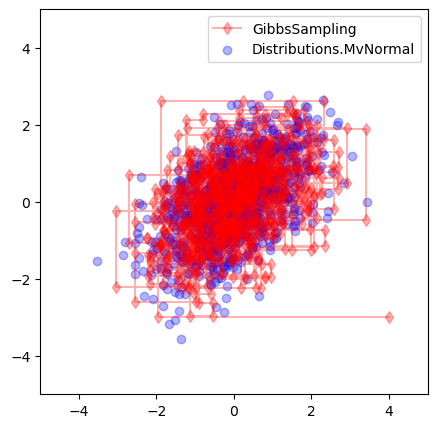

In [8]:
fig = figure(figsize=(5, 5));
ax = fig.subplots(1, 1);

ax.scatter(zs_lib[1, :], zs_lib[2, :], color="blue", alpha=0.3, label="Distributions.MvNormal")
ax.plot(z_gs[1, :], z_gs[2, :], marker = (:d), color="red", alpha=0.3, label="GibbsSampling")
ax.set_xlim((-5, 5));
ax.set_ylim((-5, 5));
ax.legend();